In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE

###  Task 1

In [4]:
# Load the dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
feature_names = diabetes.feature_names

# Explore dataset
print("Feature names:", feature_names)
print("Dataset shape:", X.shape)
print("Target variable shape:", y.shape)

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
Dataset shape: (442, 10)
Target variable shape: (442,)


In [6]:
# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)

Training set size: (353, 10) (353,)
Testing set size: (89, 10) (89,)


### Task 2

In [22]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Evaluate the model
r2_score_test = r2_score(y_test, lr.predict(X_test))
print(f"R^2 Score on test set: {r2_score_test:.4f}")

R^2 Score on test set: 0.4526


### Task 3

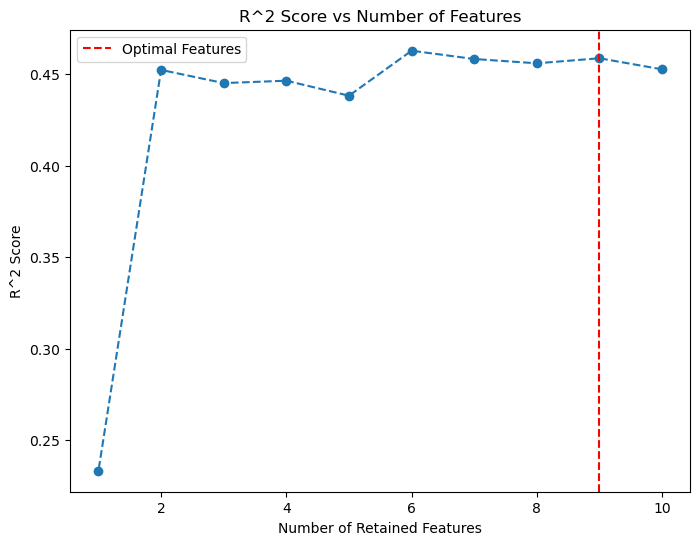

In [41]:
n_features = X.shape[1]
r2_scores = []
selected_features = []
coefficients = []

for i in range(n_features, 0, -1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    rfe.fit(X_train, y_train)
    r2_scores.append(r2_score(y_test, rfe.predict(X_test)))
    selected_features.append([feature for feature, support in zip(feature_names, rfe.support_) if support])
    coefficients.append(rfe.estimator_.coef_)

# Identify the optimal number of features
optimal_features_idx = np.argmax(np.diff(r2_scores) < 0.01) + 1
optimal_features = selected_features[optimal_features_idx]

# Plot R^2 score vs number of features
plt.figure(figsize=(8, 6))
plt.plot(range(n_features, 0, -1), r2_scores, marker='o', linestyle='dashed')
plt.axvline(x=n_features - optimal_features_idx, color='r', linestyle='--', label='Optimal Features')
plt.xlabel('Number of Retained Features')
plt.ylabel('R^2 Score')
plt.title('R^2 Score vs Number of Features')
plt.legend()
plt.show()

### Task 4

In [44]:
# Create a table showing coefficients at each iteration
coefficients_df = pd.DataFrame(coefficients, columns=feature_names, index=[f"Iteration {i+1}" for i in range(n_features)])
print("Feature Coefficients at Each Iteration:")
display(coefficients_df)

# Analyze the three most important features
important_features = pd.Series(np.abs(lr.coef_), index=feature_names).nlargest(3)
print("Three Most Important Features:")
print(important_features)

# Compare initial ranking vs final selected features
print("Initial Feature Ranking:")
print(pd.Series(np.abs(lr.coef_), index=feature_names).sort_values(ascending=False))
print("Final Selected Features:")
print(optimal_features)

Feature Coefficients at Each Iteration:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
Iteration 1,37.904021,-241.964362,542.428759,347.703844,-931.488846,518.062277,163.419983,275.317902,736.198859,48.670657
Iteration 2,-236.649588,542.799508,354.211438,-936.350589,528.796592,167.800414,270.396514,744.447429,53.350483,NaN
Iteration 3,-233.754686,550.744365,363.791753,-947.823133,541.585796,172.250588,277.741072,761.921177,NaN,NaN
Iteration 4,-235.364224,551.866448,362.356114,-660.643160,343.348089,185.140764,664.774591,NaN,NaN,NaN
Iteration 5,-215.267423,557.314167,350.178667,-851.515734,591.093315,803.121285,NaN,NaN,NaN,NaN
Iteration 6,597.892739,306.647913,-655.560612,409.622184,728.643647,NaN,NaN,NaN,NaN,NaN
Iteration 7,691.460102,-592.977874,362.950323,783.168538,NaN,NaN,NaN,NaN,NaN,NaN
Iteration 8,737.685594,-228.339889,680.224653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iteration 9,732.109021,562.226535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Iteration 10,998.577689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Three Most Important Features:
s1     931.488846
s5     736.198859
bmi    542.428759
dtype: float64
Initial Feature Ranking:
s1     931.488846
s5     736.198859
bmi    542.428759
s2     518.062277
bp     347.703844
s4     275.317902
sex    241.964362
s3     163.419983
s6      48.670657
age     37.904021
dtype: float64
Final Selected Features:
['sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


### Task 5

1. What did you learn about feature selection using RFE?

It systematically removes the least significant features to improve model interpretability and allows us to identify the most relevant predictors while maintaining predictive performance. The R^2 score on the test set (0.4526) shows a reasonable fit but indicates that additional non-linear modeling may be beneficial.

2. How does RFE compare to other feature selection methods like LASSO in terms of methodology and results?

RFE removes features iteratively based on their impact on model performance, while LASSO applies L1 regularization to shrink some coefficients to zero. It provides an explicit ranking of features, whereas LASSO may remove features depending on the regularization parameter. Both methods help reduce overfitting, but LASSO can handle high-dimensional data better due to its built-in feature selection.

3. What insights can you draw about the dataset from the selected features?

The most important features (s1, s5, bmi) play a significant role in predicting diabetes progression.
- s1 and s5 have the highest absolute coefficients, suggesting they have the strongest correlation with disease progression.
- bmi is a well-known health indicator, reinforcing its relevance in diabetes prediction.
- Some initially highly-ranked features like age were removed, indicating their lesser predictive power in this dataset.